In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [2]:

raw_dataset = pd.read_csv('SF data summary backfiled(6M).csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.tail(20)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
146,5/1/2017,252.430756,4.01,100236,4726.314,3.1,562155.764,715.0030,34.70%,374524,0.50%,1356,4.52,237.107
147,6/1/2017,255.294023,3.90,100236,4726.314,3.5,562155.764,715.0030,34.70%,374524,0.50%,2358,4.72,237.107
148,7/1/2017,258.569765,3.97,100236,4726.314,3.7,562155.764,715.0030,34.70%,375162,0.50%,1407,4.30,235.803
149,8/1/2017,260.248492,3.88,100236,4726.314,3.6,562155.764,715.0030,34.70%,375162,0.50%,1582,4.20,235.803
150,9/1/2017,261.822888,3.81,100236,4726.314,3.1,562155.764,715.0030,34.70%,375162,0.50%,906,4.48,237.011
151,10/1/2017,261.714329,3.90,100236,4726.314,3.0,562155.764,715.0030,34.40%,376057,0.50%,1576,4.61,237.011
152,11/1/2017,263.664436,3.92,100236,4726.314,2.9,562155.764,715.0030,34.40%,376057,0.50%,1372,4.82,236.108
153,12/1/2017,264.833339,3.95,100236,4726.314,2.8,562155.764,715.0030,34.40%,376057,0.50%,2004,4.95,236.108
154,1/1/2018,266.780509,4.03,100236,4726.314,3.1,562155.764,690.8945,34.80%,373953,0.50%,933,5.02,240.742
155,2/1/2018,267.559797,4.33,104921,4731.803,3.0,591945.456,690.8945,34.80%,373953,0.50%,1366,4.95,240.742


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,212.697917,5.93,55702,4149.607,5.1,284589.379,798.882,357406,1201,2.90,182.9,40.3,0.3
1,4/1/2005,214.124946,5.86,60712,4162.783,4.7,302385.828,798.882,364189,1239,3.01,182.9,40.3,0.3
2,5/1/2005,215.514527,5.72,60712,4162.783,4.5,302385.828,798.882,364189,1304,2.58,180.6,40.3,0.3
3,6/1/2005,216.413650,5.58,60712,4162.783,4.9,302385.828,798.882,364189,1345,3.00,180.6,40.3,0.3
4,7/1/2005,217.401881,5.70,60712,4162.783,5.0,302385.828,798.882,367957,1337,3.20,183.4,40.1,0.3


In [4]:
features.isna().sum()

Date                                     0
House_Price_Index(S&P/Case-Shiller)      0
Mortgage_Rate (30 yers)                  0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
New_Structures                           0
Economic_Conditions_Index                0
CPI less shelter                         0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:
features=features.drop('Date',axis=1)
train_dataset = features.iloc[:154]
test_dataset = features.iloc[154:]

In [6]:
train_dataset

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,212.697917,5.93,55702,4149.607,5.1,284589.379,798.882,357406,1201,2.90,182.900,40.3,0.3
1,214.124946,5.86,60712,4162.783,4.7,302385.828,798.882,364189,1239,3.01,182.900,40.3,0.3
2,215.514527,5.72,60712,4162.783,4.5,302385.828,798.882,364189,1304,2.58,180.600,40.3,0.3
3,216.413650,5.58,60712,4162.783,4.9,302385.828,798.882,364189,1345,3.00,180.600,40.3,0.3
4,217.401881,5.70,60712,4162.783,5.0,302385.828,798.882,367957,1337,3.20,183.400,40.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,260.248492,3.88,100236,4726.314,3.6,562155.764,715.003,375162,1582,4.20,235.803,34.7,0.5
150,261.822888,3.81,100236,4726.314,3.1,562155.764,715.003,375162,906,4.48,237.011,34.7,0.5
151,261.714329,3.90,100236,4726.314,3.0,562155.764,715.003,376057,1576,4.61,237.011,34.4,0.5
152,263.664436,3.92,100236,4726.314,2.9,562155.764,715.003,376057,1372,4.82,236.108,34.4,0.5


In [7]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index(S&P/Case-Shiller)')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.3500,3.9125,4.4300,5.8500,6.7600
Personal_Income,154.0,73296.090909,12912.699718,55702.0000,62995.0000,70428.0000,82639.0000,100236.0000
Resident_Population,154.0,4463.026591,190.168976,4149.6070,4317.8530,4455.4730,4647.9240,4726.3140
Unemployment_Rate,154.0,6.039610,2.257954,2.8000,4.2250,5.0000,8.2000,10.3000
GDP,154.0,392108.744721,85040.790805,284589.3790,318298.1580,366308.5150,452979.8750,562155.7640
Crime_Rate,154.0,771.943145,70.712444,659.6285,710.5509,776.8164,844.9603,875.6375
Median_Debt,154.0,387565.389610,19718.400180,357406.0000,370188.0000,376057.0000,405585.2500,421588.0000
New_Structures,154.0,848.733766,472.622402,136.0000,434.7500,801.0000,1236.2500,2358.0000
Economic_Conditions_Index,154.0,3.108052,3.370036,-9.4500,2.2825,4.2450,5.2425,7.0400
CPI less shelter,154.0,214.132597,16.378875,180.6000,200.7760,217.8750,229.1370,237.1070


In [8]:
train_labels = train_dataset.pop('House_Price_Index(S&P/Case-Shiller)')
test_labels = test_dataset.pop('House_Price_Index(S&P/Case-Shiller)')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.362542,-1.648111,-0.416134,-1.264327,0.380963,-1.529505,0.745344,-0.061736,-1.906883,0.790575,-1.046702
1,1.051011,-0.974552,-1.578825,-0.593285,-1.055057,0.380963,-1.185511,0.825746,-0.029095,-1.906883,0.790575,-1.046702
2,0.916107,-0.974552,-1.578825,-0.681861,-1.055057,0.380963,-1.185511,0.963277,-0.156690,-2.047308,0.790575,-1.046702
3,0.781203,-0.974552,-1.578825,-0.504709,-1.055057,0.380963,-1.185511,1.050027,-0.032063,-2.047308,0.790575,-1.046702
4,0.896835,-0.974552,-1.578825,-0.460421,-1.055057,0.380963,-0.994421,1.033100,0.027284,-1.876356,0.705851,-1.046702
5,1.012467,-0.974552,-1.578825,-0.548997,-1.055057,0.380963,-0.994421,0.893454,0.024317,-1.876356,0.705851,-1.046702
6,0.964287,-0.974552,-1.578825,-0.593285,-1.055057,0.380963,-0.994421,2.753289,0.068827,-1.644350,0.705851,-1.046702
7,1.253366,-0.974552,-1.578825,-0.637573,-1.055057,0.380963,-0.623295,0.184643,0.128173,-1.644350,0.748213,-1.046702
8,1.503902,-0.974552,-1.578825,-0.593285,-1.055057,0.380963,-0.623295,1.744027,0.249834,-1.894672,0.748213,-1.046702
9,1.446086,-0.974552,-1.578825,-0.859012,-1.055057,0.380963,-0.623295,0.802472,0.347755,-1.894672,0.748213,-1.046702


In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.07303484],
       [-0.01220536],
       [-0.01425648],
       [ 0.02809924],
       [ 0.01863116],
       [-0.0021064 ],
       [-0.06885533],
       [ 0.02583058],
       [-0.04827943],
       [-0.00906122]], dtype=float32)

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

KeyError: 'val_mae'

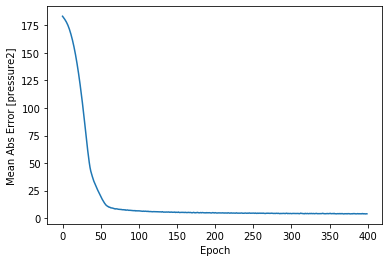

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 11.7
Accuracy: 95.59 %.


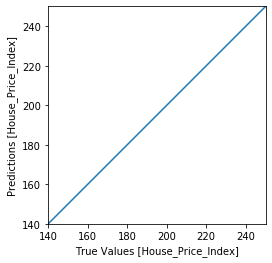

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.77
Accuracy: 97.97 %.


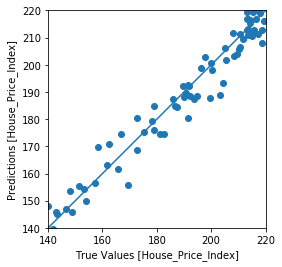

In [16]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [17]:
prediction_features=features   #produce prediction result
prediction_features

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,212.697917,5.93,55702,4149.607,5.1,284589.379,798.8820,357406,1201,2.90,182.900,40.3,0.3
1,214.124946,5.86,60712,4162.783,4.7,302385.828,798.8820,364189,1239,3.01,182.900,40.3,0.3
2,215.514527,5.72,60712,4162.783,4.5,302385.828,798.8820,364189,1304,2.58,180.600,40.3,0.3
3,216.413650,5.58,60712,4162.783,4.9,302385.828,798.8820,364189,1345,3.00,180.600,40.3,0.3
4,217.401881,5.70,60712,4162.783,5.0,302385.828,798.8820,367957,1337,3.20,183.400,40.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,263.283948,4.55,104921,4731.803,2.9,591945.456,690.8945,374017,1736,3.70,245.933,34.5,0.4
162,264.448766,4.63,104921,4731.803,2.6,591945.456,690.8945,374017,742,3.42,248.281,34.5,0.4
163,266.274775,4.83,104921,4731.803,2.7,591945.456,690.8945,374849,1262,3.45,248.281,33.9,0.4
164,266.387974,4.87,104921,4731.803,2.6,591945.456,690.8945,374849,776,3.39,247.939,33.9,0.4


In [18]:
prediction_features.pop('House_Price_Index(S&P/Case-Shiller)')
normed_prediction_features=norm(prediction_features)
prediction_result=model.predict(normed_prediction_features)
prediction_result=pd.DataFrame(prediction_result)
rawdataset=raw_dataset.join(prediction_result)
rawdataset                              

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,0
0,3/1/2005,212.697917,5.93,55702,4149.607,5.1,284589.379,798.8820,40.30%,357406,0.30%,1201,2.90,182.900,223.805771
1,4/1/2005,214.124946,5.86,60712,4162.783,4.7,302385.828,798.8820,40.30%,364189,0.30%,1239,3.01,182.900,215.356079
2,5/1/2005,215.514527,5.72,60712,4162.783,4.5,302385.828,798.8820,40.30%,364189,0.30%,1304,2.58,180.600,219.379349
3,6/1/2005,216.413650,5.58,60712,4162.783,4.9,302385.828,798.8820,40.30%,364189,0.30%,1345,3.00,180.600,216.843216
4,7/1/2005,217.401881,5.70,60712,4162.783,5.0,302385.828,798.8820,40.10%,367957,0.30%,1337,3.20,183.400,211.415939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,8/1/2018,263.283948,4.55,104921,4731.803,2.9,591945.456,690.8945,34.50%,374017,0.40%,1736,3.70,245.933,276.017395
162,9/1/2018,264.448766,4.63,104921,4731.803,2.6,591945.456,690.8945,34.50%,374017,0.40%,742,3.42,248.281,279.988495
163,10/1/2018,266.274775,4.83,104921,4731.803,2.7,591945.456,690.8945,33.90%,374849,0.40%,1262,3.45,248.281,281.820862
164,11/1/2018,266.387974,4.87,104921,4731.803,2.6,591945.456,690.8945,33.90%,374849,0.40%,776,3.39,247.939,281.851746


In [19]:
rawdataset.to_csv('prediction-result.csv',index = False, header=True)